In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [3]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import  RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white', context='notebook', palette='deep')

# 2-1 load data

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# data preprocessing

In [5]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


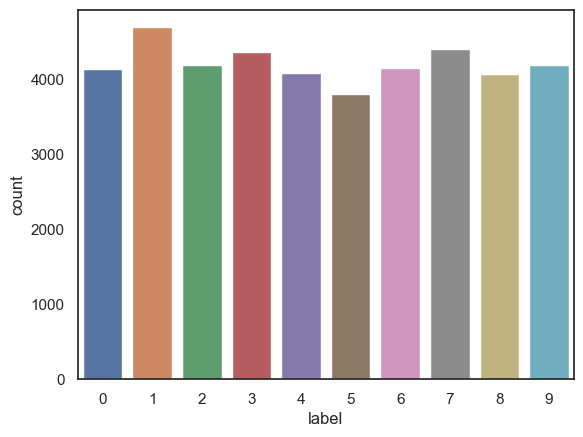

In [6]:
y_train=train['label']
x_train=train.drop(labels=['label'],axis=1)
del train
g= sns.countplot(y_train)

<BarContainer object of 10 artists>

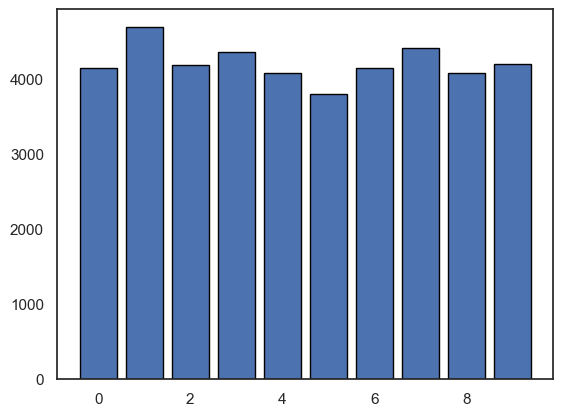

In [7]:
l,c=np.unique(y_train,return_counts=True)
plt.bar(l,c,edgecolor='black')

(array([4132., 4684., 4177., 4351., 4072., 3795., 4137., 4401., 4063.,
        4188.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

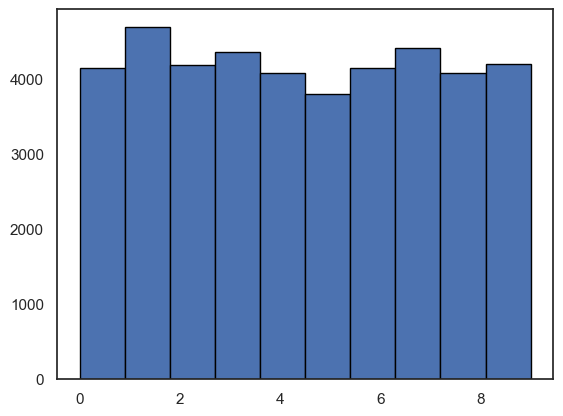

In [8]:
l,c=np.unique(y_train,return_counts=True)
plt.hist(y_train, bins=len(set(y_train)), edgecolor='black')

In [9]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

# 2-2 check for null and missing values

In [10]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [11]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

# 2-3 normalization

In [12]:
x_train=x_train/255.0
test=test/255.0
x_train.shape

(42000, 784)

# 2.3 reshape

In [13]:
x_train=x_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [14]:
x_train.shape

(42000, 28, 28, 1)

# 2-5 label encoding

In [15]:
y_train=to_categorical(y_train,num_classes=10)

# 2-6 split training and validation set

In [16]:
random_seed=2

In [17]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.1,random_state=42)

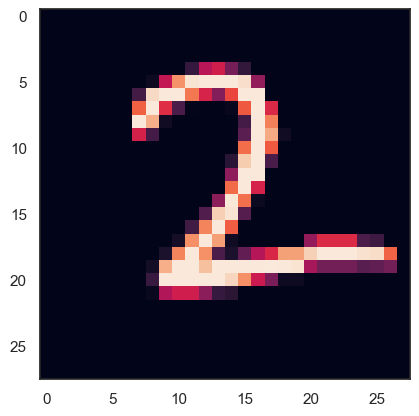

In [18]:
g=plt.imshow(x_train[4])

# Model Training

In [19]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# 3-2 set the optimizer and annealer

In [20]:
optimizer=RMSprop(lr=0.001,rho=0.9,epsilon=1e-08)

In [21]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                        

In [23]:
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',
                                          patience=3,
                                          verbose=1,
                                          factor=0.2,
                                          min_lr=0.00001
                                        )

In [24]:
epochs=5
batch_size=86

# 3-3 data augmentation

In [25]:

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  
datagen.fit(x_train)

In [26]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

C:\Users\Farah\AppData\Local\Temp\ipykernel_3068\3295086577.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/5
439/439 [==============================] - ETA: 0s - loss: 0.4193 - accuracy: 0.8668WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


439/439 [==============================] - 329s 742ms/step - loss: 0.4193 - accuracy: 0.8668 - val_loss: 0.0727 - val_accuracy: 0.9790 - lr: 0.0010
Epoch 2/5
439/439 [==============================] - ETA: 0s - loss: 0.1262 - accuracy: 0.9624WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


439/439 [==============================] - 392s 892ms/step - loss: 0.1262 - accuracy: 0.9624 - val_loss: 0.0517 - val_accuracy: 0.9824 - lr: 0.0010
Epoch 3/5
439/439 [==============================] - ETA: 0s - loss: 0.0889 - accuracy: 0.9727WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


439/439 [==============================] - 565s 1s/step - loss: 0.0889 - accuracy: 0.9727 - val_loss: 0.0371 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 4/5
439/439 [==============================] - ETA: 0s - loss: 0.0728 - accuracy: 0.9785WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


439/439 [==============================] - 598s 1s/step - loss: 0.0728 - accuracy: 0.9785 - val_loss: 0.0323 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 5/5
439/439 [==============================] - ETA: 0s - loss: 0.0647 - accuracy: 0.9805WARNING:tensorflow:Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy,val_loss,val_accuracy,lr


439/439 [==============================] - 579s 1s/step - loss: 0.0647 - accuracy: 0.9805 - val_loss: 0.0262 - val_accuracy: 0.9919 - lr: 0.0010


# 4-evaluate model

# 4-1-traiing and validation curves

In [27]:
training_loss=history.history['loss']

In [28]:
training_accuracy=history.history['accuracy']

In [29]:
validation_loss=history.history['val_loss']
validation_loss

[0.07274401187896729,
 0.05165118724107742,
 0.037089843302965164,
 0.032344602048397064,
 0.026239799335598946]

In [30]:
validation_accuracy=history.history['val_accuracy']
validation_accuracy

[0.9790475964546204,
 0.9823809266090393,
 0.9902380704879761,
 0.9885714054107666,
 0.9919047355651855]

In [31]:
epo=list(range(1,epochs+1))
epo

[1, 2, 3, 4, 5]

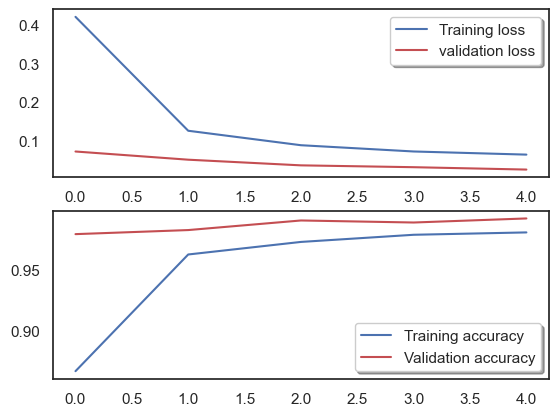

In [32]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# 4-2 confusion metrix

132/132 [==============================] - 13s 91ms/step


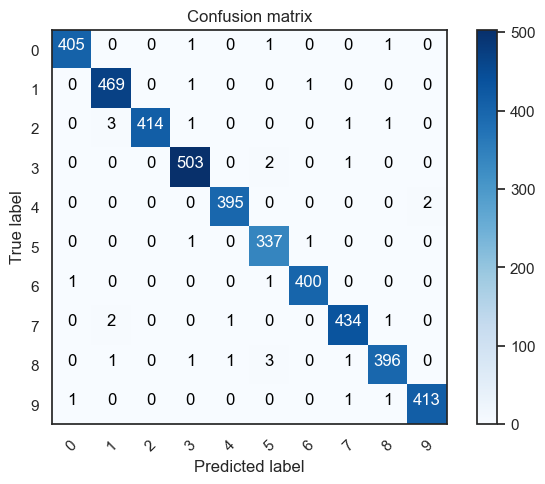

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Predict the values from the validation dataset
y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [34]:
print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (4200, 10)


In [35]:
# Predict the values from the validation dataset
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred,axis = 1) 

132/132 [==============================] - 12s 87ms/step


In [36]:
y_pred[40,:]

array([9.32879208e-12, 2.36221243e-09, 8.67547787e-12, 8.33941857e-12,
       3.82068043e-04, 7.39826117e-11, 7.23890294e-13, 1.93580174e-08,
       1.20922605e-08, 9.99617934e-01], dtype=float32)

In [37]:
np.argmax(y_pred[:,:],axis = 1)[40]

9

In [38]:
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
y_val_errors = x_val[errors]

In [40]:
y_val_errors.shape

(34, 28, 28, 1)

In [41]:
y_val_errors.shape

(34, 28, 28, 1)

In [42]:
y_pred_classes[True].shape

(1, 4200)

In [43]:
# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)
# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-10:]

In [44]:
most_important_errors 

array([11, 25, 21, 10,  1,  2, 30, 22, 13, 17], dtype=int64)

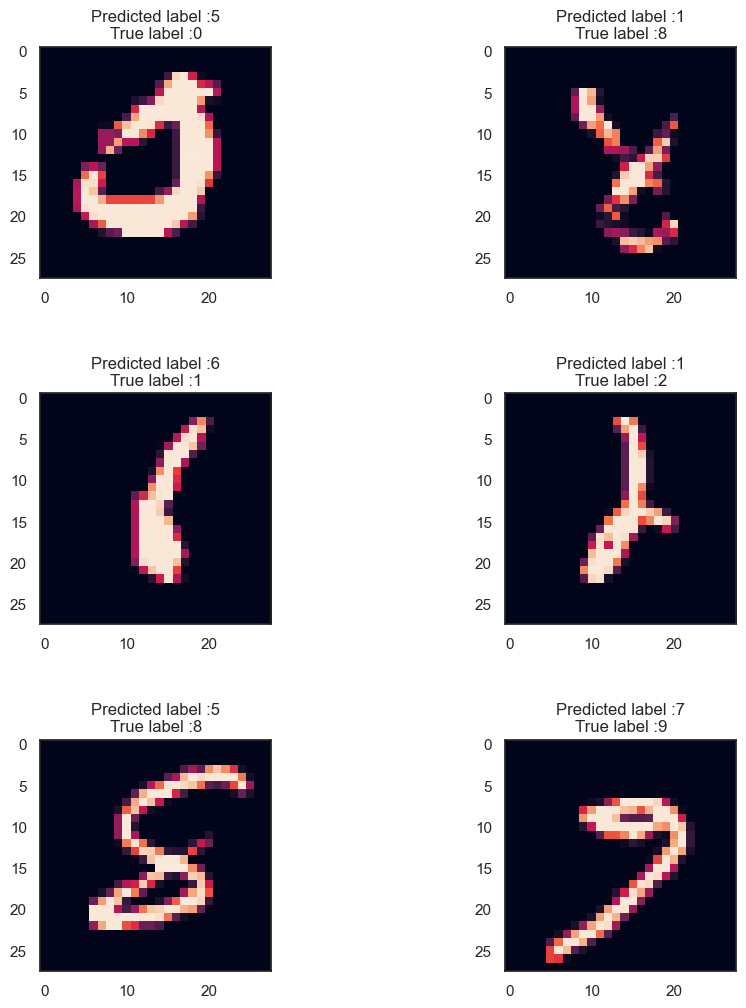

In [45]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 3
    ncols = 2
    fig, ax = plt.subplots(nrows, ncols,figsize=(10,12))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            current_image = img_errors[error]

            # Check if the image size is 10
            if current_image.size == 10:
                print(f"Skipping image {error} with size 10")
                n += 1
                continue

            
            ax[row, col].imshow((img_errors[error]).reshape((28, 28)))
            ax[row, col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error], obs_errors[error]))
            n += 1
    # Adjust layout to add space between subplots
    plt.subplots_adjust(hspace=0.5, wspace=0.5)


# Show the top 6 errors
display_errors(most_important_errors, y_val_errors, y_pred_classes_errors, y_true_errors)